In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Engineering_graduate_salary (3).csv to Engineering_graduate_salary (3).csv


In [4]:
df= pd.read_csv('/content/Engineering_graduate_salary (3).csv')
df.head()

ID Gender         DOB  10percentage                       10board  \
0  604399      f  1990-10-22         87.80                          cbse   
1  988334      m  1990-05-15         57.00                          cbse   
2  301647      m  1989-08-21         77.33  maharashtra state board,pune   
3  582313      m  1991-05-04         84.30                          cbse   
4  339001      f  1990-10-30         82.00                          cbse   

   12graduation  12percentage                    12board  CollegeID  \
0          2009         84.00                       cbse       6920   
1          2010         64.50                       cbse       6624   
2          2007         85.17  amravati divisional board       9084   
3          2009         86.00                       cbse       8195   
4          2008         75.00                       cbse       4889   

   CollegeTier  ... MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0            1  ...             -1             -1           -1         -1   
1            2  ...             -1             -1           -1         -1   
2            2  ...             -1             -1          260         -1   
3            1  ...             -1             -1           -1         -1   
4            2  ...             -1             -1           -1         -1   

   conscientiousness agreeableness  extraversion  nueroticism  \
0            -0.1590        0.3789        1.2396      0.14590   
1             1.1336        0.0459        1.2396      0.52620   
2             0.5100       -0.1232        1.5428     -0.29020   
3            -0.4463        0.2124        0.3174      0.27270   
4            -1.4992       -0.7473       -1.0697      0.06223   

   openess_to_experience  Salary  
0                 0.2889  445000  
1                -0.2859  110000  
2                -0.2875  255000  
3                 0.4805  420000  
4                 0.1864  200000  

[5 rows x 34 columns]

In [5]:
df.shape

(2998, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [7]:
for i in range(df.shape[1]):
  print(df.iloc[:,i].unique())
  print(df.iloc[:,i].value_counts())

[604399 988334 301647 ... 287070 317336 993701]
ID
604399     1
822977     1
956695     1
30388      1
331122     1
          ..
1242936    1
50216      1
416468     1
1105982    1
993701     1
Name: count, Length: 2998, dtype: int64
['f' 'm']
Gender
m    2282
f     716
Name: count, dtype: int64
['1990-10-22' '1990-05-15' '1989-08-21' ... '1985-02-23' '1986-02-08'
 '1988-11-24']
DOB
1991-07-03    7
1991-07-31    6
1990-12-10    6
1990-10-07    6
1990-08-08    6
             ..
1991-04-23    1
1991-07-10    1
1990-03-03    1
1987-04-15    1
1988-11-24    1
Name: count, Length: 1633, dtype: int64
[87.8  57.   77.33 84.3  82.   83.16 72.5  77.   76.8  81.2  85.   90.
 86.4  84.13 81.7  86.   66.15 79.29 60.   58.4  61.   50.   67.06 67.
 73.   86.17 78.   71.8  66.66 83.6  61.69 80.13 82.5  63.5  64.   76.
 91.   65.   70.16 74.6  66.5  78.4  62.   52.93 70.2  93.   53.4  84.2
 71.5  81.5  63.   74.   91.6  87.5  78.5  79.5  71.   66.   89.44 90.33
 76.5  70.   89.5  56.4  88.67 58.33 85.

In [8]:
df.isna().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [9]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [10]:
df.drop(['ID','DOB','CollegeID','12graduation','10board','12board','CollegeState','CollegeCityID', 'CollegeCityTier','GraduationYear'], axis=1, inplace=True)
print(df)

     Gender  10percentage  12percentage  CollegeTier       Degree  \
0         f         87.80         84.00            1  B.Tech/B.E.   
1         m         57.00         64.50            2  B.Tech/B.E.   
2         m         77.33         85.17            2  B.Tech/B.E.   
3         m         84.30         86.00            1  B.Tech/B.E.   
4         f         82.00         75.00            2  B.Tech/B.E.   
...     ...           ...           ...          ...          ...   
2993      f         75.00         73.00            2  B.Tech/B.E.   
2994      f         84.00         77.00            2  B.Tech/B.E.   
2995      m         91.40         65.56            2  B.Tech/B.E.   
2996      m         88.64         65.16            2  B.Tech/B.E.   
2997      m         77.00         75.50            2  B.Tech/B.E.   

                                 Specialization  collegeGPA  English  Logical  \
0       instrumentation and control engineering       73.82      650      665   
1        

In [11]:
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   10percentage           2998 non-null   float64
 2   12percentage           2998 non-null   float64
 3   CollegeTier            2998 non-null   int64  
 4   Degree                 2998 non-null   object 
 5   Specialization         2998 non-null   object 
 6   collegeGPA             2998 non-null   float64
 7   English                2998 non-null   int64  
 8   Logical                2998 non-null   int64  
 9   Quant                  2998 non-null   int64  
 10  Domain                 2998 non-null   float64
 11  ComputerProgramming    2998 non-null   int64  
 12  ElectronicsAndSemicon  2998 non-null   int64  
 13  ComputerScience        2998 non-null   int64  
 14  MechanicalEngg         2998 non-null   int64  
 15  Elec

In [13]:
df['Degree'] = df['Degree'].replace({
    'M.Tech./M.E.': 'M.Tech/M.E. or M.Sc. (Tech.)',
    'M.Sc. (Tech.)': 'M.Tech/M.E. or M.Sc. (Tech.)'
})
print(df)

     Gender  10percentage  12percentage  CollegeTier       Degree  \
0         f         87.80         84.00            1  B.Tech/B.E.   
1         m         57.00         64.50            2  B.Tech/B.E.   
2         m         77.33         85.17            2  B.Tech/B.E.   
3         m         84.30         86.00            1  B.Tech/B.E.   
4         f         82.00         75.00            2  B.Tech/B.E.   
...     ...           ...           ...          ...          ...   
2993      f         75.00         73.00            2  B.Tech/B.E.   
2994      f         84.00         77.00            2  B.Tech/B.E.   
2995      m         91.40         65.56            2  B.Tech/B.E.   
2996      m         88.64         65.16            2  B.Tech/B.E.   
2997      m         77.00         75.50            2  B.Tech/B.E.   

                                 Specialization  collegeGPA  English  Logical  \
0       instrumentation and control engineering       73.82      650      665   
1        

In [14]:
df.Degree.value_counts()

Degree
B.Tech/B.E.                     2757
MCA                              200
M.Tech/M.E. or M.Sc. (Tech.)      41
Name: count, dtype: int64

In [15]:
df.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application',
       'computer science and technology', 'electrical engineering',
       'automobile/automotive engineering',
       'electronics and electrical engineering',
       'information science engineering', 'chemical engineering',
       'instrumentation engineering', 'electronics & instrumentation eng',
       'ceramic engineering', 'metallurgical engineering',
       'aeronautical engineering', 'electronics engineering',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation', 'civil engineering',
       'computer and communication engineering',
       'industrial & production engineering', 'computer networking',
       'other', '

In [16]:
specialization_mapping = {
    #'instrumentation and control engineering':'other',
    'computer science & engineering': 'Computer Science & Engineering',
    'electronics & telecommunications': 'Electronics & Electrical Engineering',
    #'biotechnology':'other',
    'mechanical engineering': 'Mechanical Engineering & Related Fields',
    'information technology': 'Information Technology & Science',
    'electronics and communication engineering': 'Electronics & Electrical Engineering',
    'computer engineering': 'Computer Science & Engineering',
    'computer application': 'Computer Science & Engineering',
    'computer science and technology': 'Computer Science & Engineering',
    'electrical engineering': 'Electronics & Electrical Engineering',
    'automobile/automotive engineering': 'Mechanical Engineering & Related Fields',
    'electronics and electrical engineering': 'Electronics & Electrical Engineering',
    'information science engineering': 'Information Technology & Science',
    #'chemical engineering':'other',
    #'instrumentation engineering':'other',
    'electronics & instrumentation eng': 'Electronics & Electrical Engineering',
    #'ceramic engineering': 'other',
    #'metallurgical engineering':'other',
    #'aeronautical engineering':'other',
    'electronics engineering': 'Electronics & Electrical Engineering',
    'electronics and instrumentation engineering': 'Electronics & Electrical Engineering',
    'applied electronics and instrumentation': 'Electronics & Electrical Engineering',
    #'civil engineering':'other',
    'computer and communication engineering': 'Computer Science & Engineering',
    #'industrial & production engineering':'other',
    'computer networking': 'Computer Science & Engineering',
    'electronics and computer engineering': 'Electronics & Electrical Engineering',
    #'control and instrumentation engineering':'other',
    'mechanical & production engineering': 'Mechanical Engineering & Related Fields',
    'mechanical and automation': 'Mechanical Engineering & Related Fields',
    #'industrial & management engineering':'other',
    #'biomedical engineering':'other',
    'electrical and power engineering': 'Electronics & Electrical Engineering',
    'telecommunication engineering': 'Electronics & Electrical Engineering',
    #'industrial engineering':'other',
    'mechatronics': 'Mechanical Engineering & Related Fields',
    'embedded systems technology': 'Computer Science & Engineering',
    'information & communication technology': 'Information Technology & Science',
    'information science': 'Information Technology & Science'
}

In [17]:
df['Specialization'] = df['Specialization'].map(specialization_mapping)

# Fill NaNs if any specialization was not in the mapping
df['Specialization'].fillna('Other/Uncategorized', inplace=True)

# Check the transformed data
print(df['Specialization'].value_counts())

Specialization
Computer Science & Engineering             1180
Electronics & Electrical Engineering       1038
Information Technology & Science            526
Mechanical Engineering & Related Fields     168
Other/Uncategorized                          86
Name: count, dtype: int64


<ipython-input-17-c2a2de30c2c6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Specialization'].fillna('Other/Uncategorized', inplace=True)


In [18]:
df.Specialization.value_counts()

Specialization
Computer Science & Engineering             1180
Electronics & Electrical Engineering       1038
Information Technology & Science            526
Mechanical Engineering & Related Fields     168
Other/Uncategorized                          86
Name: count, dtype: int64

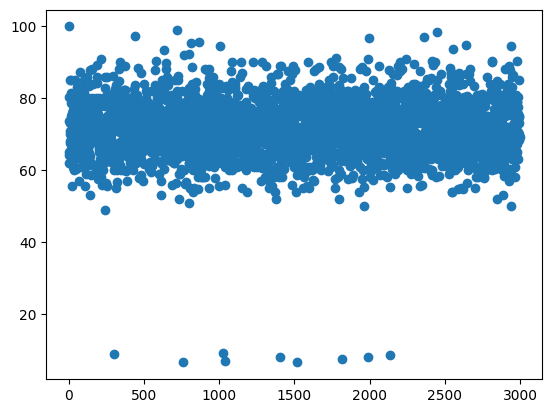

In [19]:
plt.scatter(df.index, df['collegeGPA'])

In [20]:
df = df[(df['collegeGPA']>40)]
df.shape

(2989, 24)

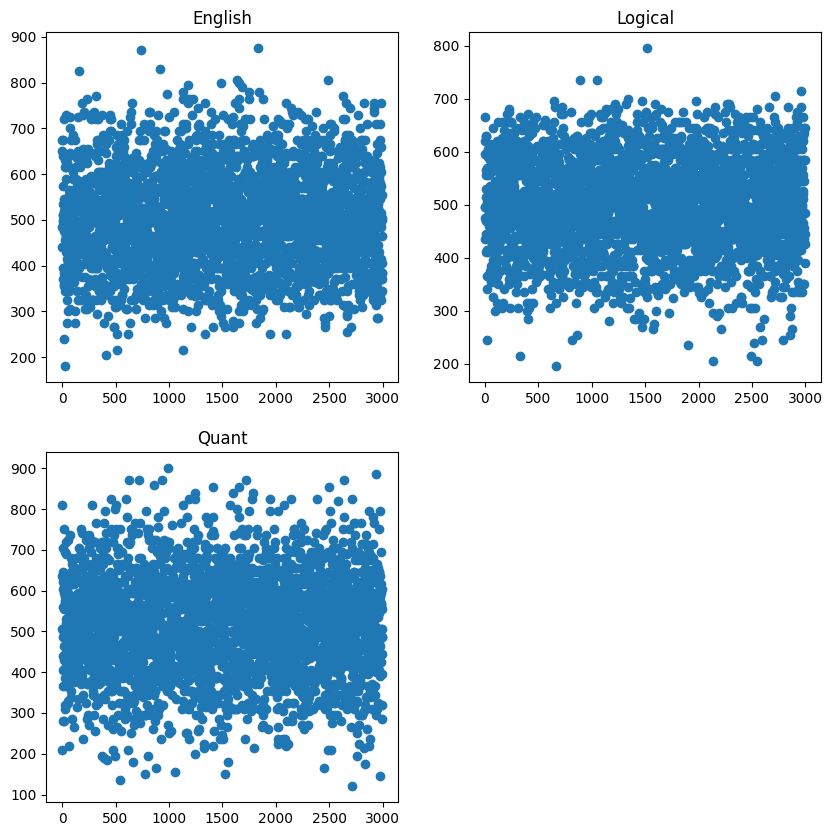

In [21]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(df.index, df.English)
plt.title('English')

plt.subplot(2,2,2)
plt.scatter(df.index, df.Logical)
plt.title('Logical')

plt.subplot(2,2,3)
plt.scatter(df.index, df.Quant)
plt.title('Quant')

plt.show()

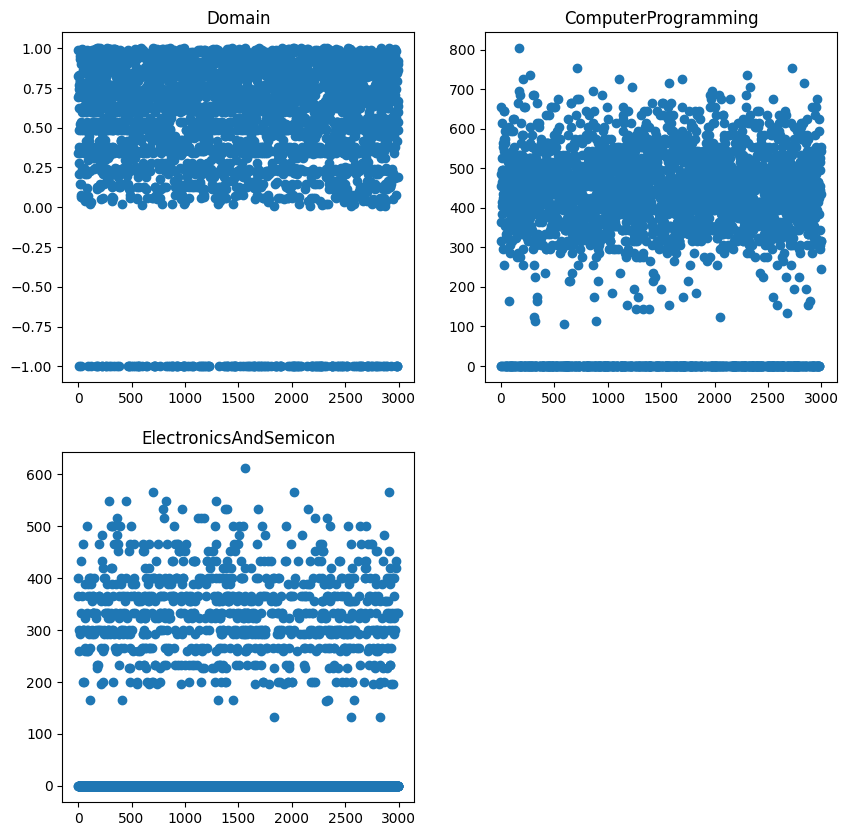

In [22]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(df.index, df.Domain)
plt.title('Domain')

plt.subplot(2,2,2)
plt.scatter(df.index, df.ComputerProgramming)
plt.title('ComputerProgramming')

plt.subplot(2,2,3)
plt.scatter(df.index, df.ElectronicsAndSemicon)
plt.title('ElectronicsAndSemicon')

plt.show()

In [23]:
import numpy as np

In [24]:
df.replace(-1, 0, inplace=True)

# Verify results
print(df)

     Gender  10percentage  12percentage  CollegeTier       Degree  \
0         f         87.80         84.00            1  B.Tech/B.E.   
1         m         57.00         64.50            2  B.Tech/B.E.   
2         m         77.33         85.17            2  B.Tech/B.E.   
3         m         84.30         86.00            1  B.Tech/B.E.   
4         f         82.00         75.00            2  B.Tech/B.E.   
...     ...           ...           ...          ...          ...   
2993      f         75.00         73.00            2  B.Tech/B.E.   
2994      f         84.00         77.00            2  B.Tech/B.E.   
2995      m         91.40         65.56            2  B.Tech/B.E.   
2996      m         88.64         65.16            2  B.Tech/B.E.   
2997      m         77.00         75.50            2  B.Tech/B.E.   

                            Specialization  collegeGPA  English  Logical  \
0                      Other/Uncategorized       73.82      650      665   
1           Compute

In [25]:
columns_to_normalize = ['agreeableness', 'conscientiousness', 'openess_to_experience', 'nueroticism','extraversion']
# Replace negative values with 0
for col in columns_to_normalize:
    df[col] = df[col].clip(lower=0)

# Verify results
print(df[columns_to_normalize].head())

   agreeableness  conscientiousness  openess_to_experience  nueroticism  \
0         0.3789             0.0000                 0.2889      0.14590   
1         0.0459             1.1336                 0.0000      0.52620   
2         0.0000             0.5100                 0.0000      0.00000   
3         0.2124             0.0000                 0.4805      0.27270   
4         0.0000             0.0000                 0.1864      0.06223   

   extraversion  
0        1.2396  
1        1.2396  
2        1.5428  
3        0.3174  
4        0.0000  


In [26]:
max_value = df['Salary'].max()
min_value = df['Salary'].min()
print("Maximum value:", max_value)
print("Minimum value:", min_value)
mean_salary = df['Salary'].mean()
print("Mean value:", mean_salary)

Maximum value: 4000000
Minimum value: 35000
Mean value: 305086.65105386416


In [27]:
salary_threshold = df['Salary'].mean()  # You can also use mean() or a custom threshold

# Apply categorization
df['SalaryCategory'] = df['Salary'].apply(lambda x: 1  if x > salary_threshold else 0)#high:1,low:0

# Define the mapping dictionary
mapping = {"High": 1, "Low": 0}

# Verify the new columns
print(df[['Salary', 'SalaryCategory']])

# Check the distribution of categories
print(df['SalaryCategory'].value_counts())

      Salary  SalaryCategory
0     445000               1
1     110000               0
2     255000               0
3     420000               1
4     200000               0
...      ...             ...
2993  120000               0
2994  120000               0
2995  385000               1
2996  530000               1
2997  200000               0

[2989 rows x 2 columns]
SalaryCategory
0    1657
1    1332
Name: count, dtype: int64


<Axes: xlabel='openess_to_experience', ylabel='Salary'>

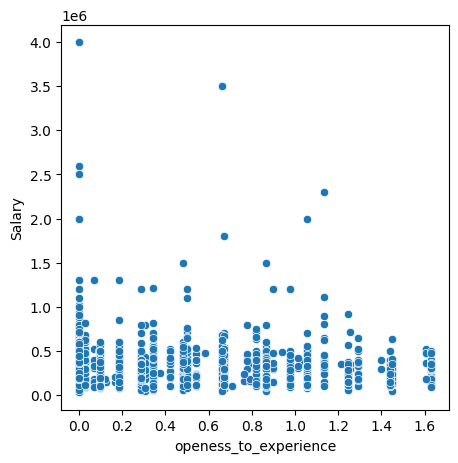

In [28]:
plt.figure(figsize = (5,5))
sns.scatterplot(x=df['openess_to_experience'], y=df['Salary'])

<Axes: xlabel='collegeGPA', ylabel='Salary'>

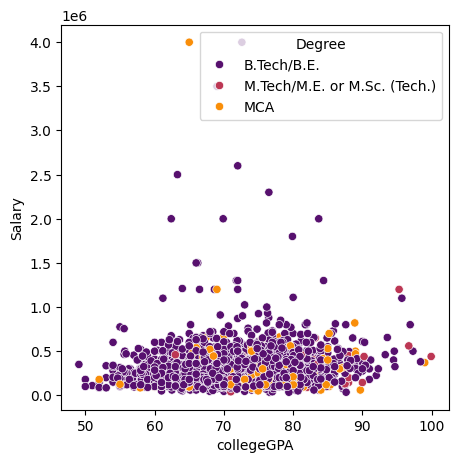

In [29]:
plt.figure(figsize = (5,5))
sns.scatterplot(x=df['collegeGPA'], y=df['Salary'], hue = df['Degree'], palette = 'inferno')

<Axes: xlabel='collegeGPA', ylabel='Salary'>

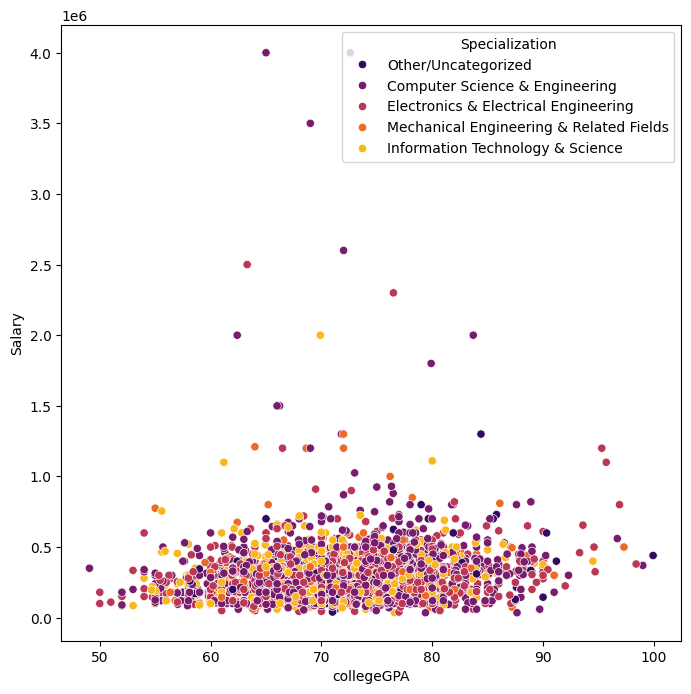

In [30]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df['collegeGPA'], y=df['Salary'], hue=df['Specialization'], palette='inferno')

In [31]:
df.drop(columns=['Salary'], inplace=True)

# Verify that the column has been dropped
print(df)

     Gender  10percentage  12percentage  CollegeTier       Degree  \
0         f         87.80         84.00            1  B.Tech/B.E.   
1         m         57.00         64.50            2  B.Tech/B.E.   
2         m         77.33         85.17            2  B.Tech/B.E.   
3         m         84.30         86.00            1  B.Tech/B.E.   
4         f         82.00         75.00            2  B.Tech/B.E.   
...     ...           ...           ...          ...          ...   
2993      f         75.00         73.00            2  B.Tech/B.E.   
2994      f         84.00         77.00            2  B.Tech/B.E.   
2995      m         91.40         65.56            2  B.Tech/B.E.   
2996      m         88.64         65.16            2  B.Tech/B.E.   
2997      m         77.00         75.50            2  B.Tech/B.E.   

                            Specialization  collegeGPA  English  Logical  \
0                      Other/Uncategorized       73.82      650      665   
1           Compute

In [32]:
df.head()

Gender  10percentage  12percentage  CollegeTier       Degree  \
0      f         87.80         84.00            1  B.Tech/B.E.   
1      m         57.00         64.50            2  B.Tech/B.E.   
2      m         77.33         85.17            2  B.Tech/B.E.   
3      m         84.30         86.00            1  B.Tech/B.E.   
4      f         82.00         75.00            2  B.Tech/B.E.   

                         Specialization  collegeGPA  English  Logical  Quant  \
0                   Other/Uncategorized       73.82      650      665    810   
1        Computer Science & Engineering       65.00      440      435    210   
2  Electronics & Electrical Engineering       61.94      485      475    505   
3        Computer Science & Engineering       80.40      675      620    635   
4                   Other/Uncategorized       64.30      575      495    365   

   ...  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0  ...               0               0            0          0   
1  ...               0               0            0          0   
2  ...               0               0          260          0   
3  ...               0               0            0          0   
4  ...               0               0            0          0   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.0000         0.3789        1.2396      0.14590   
1             1.1336         0.0459        1.2396      0.52620   
2             0.5100         0.0000        1.5428      0.00000   
3             0.0000         0.2124        0.3174      0.27270   
4             0.0000         0.0000        0.0000      0.06223   

   openess_to_experience  SalaryCategory  
0                 0.2889               1  
1                 0.0000               0  
2                 0.0000               0  
3                 0.4805               1  
4                 0.1864               0  

[5 rows x 24 columns]

In [33]:
X=df.drop(['SalaryCategory'],axis=1)

print(X)
y = df['SalaryCategory']
print(y)

     Gender  10percentage  12percentage  CollegeTier       Degree  \
0         f         87.80         84.00            1  B.Tech/B.E.   
1         m         57.00         64.50            2  B.Tech/B.E.   
2         m         77.33         85.17            2  B.Tech/B.E.   
3         m         84.30         86.00            1  B.Tech/B.E.   
4         f         82.00         75.00            2  B.Tech/B.E.   
...     ...           ...           ...          ...          ...   
2993      f         75.00         73.00            2  B.Tech/B.E.   
2994      f         84.00         77.00            2  B.Tech/B.E.   
2995      m         91.40         65.56            2  B.Tech/B.E.   
2996      m         88.64         65.16            2  B.Tech/B.E.   
2997      m         77.00         75.50            2  B.Tech/B.E.   

                            Specialization  collegeGPA  English  Logical  \
0                      Other/Uncategorized       73.82      650      665   
1           Compute

In [34]:
X= pd.get_dummies(X,dtype='int',drop_first=True)
print(X)

      10percentage  12percentage  CollegeTier  collegeGPA  English  Logical  \
0            87.80         84.00            1       73.82      650      665   
1            57.00         64.50            2       65.00      440      435   
2            77.33         85.17            2       61.94      485      475   
3            84.30         86.00            1       80.40      675      620   
4            82.00         75.00            2       64.30      575      495   
...            ...           ...          ...         ...      ...      ...   
2993         75.00         73.00            2       70.00      505      485   
2994         84.00         77.00            2       75.20      345      585   
2995         91.40         65.56            2       73.19      385      425   
2996         88.64         65.16            2       74.81      465      645   
2997         77.00         75.50            2       69.30      370      390   

      Quant    Domain  ComputerProgramming  Electro

In [35]:
#columns_to_encode = ['Degree','Specialization','Gender']

# Create dummy variables for specified columns
#dummies = pd.get_dummies(df[columns_to_encode],drop_first=True)

# Convert boolean values to integers
#dummies = dummies.astype(int)

# Concatenate original DataFrame (excluding columns to encode) with the new dummy variables
#data_encoded = pd.concat([df.drop(columns=columns_to_encode), dummies], axis=1)

#print(data_encoded)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2989 entries, 0 to 2997
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   10percentage                                            2989 non-null   float64
 1   12percentage                                            2989 non-null   float64
 2   CollegeTier                                             2989 non-null   int64  
 3   collegeGPA                                              2989 non-null   float64
 4   English                                                 2989 non-null   int64  
 5   Logical                                                 2989 non-null   int64  
 6   Quant                                                   2989 non-null   int64  
 7   Domain                                                  2989 non-null   float64
 8   ComputerProgramming                        

In [37]:
X.head()

10percentage  12percentage  CollegeTier  collegeGPA  English  Logical  \
0         87.80         84.00            1       73.82      650      665   
1         57.00         64.50            2       65.00      440      435   
2         77.33         85.17            2       61.94      485      475   
3         84.30         86.00            1       80.40      675      620   
4         82.00         75.00            2       64.30      575      495   

   Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  ...  \
0    810  0.694479                  485                    366  ...   
1    210  0.342315                  365                      0  ...   
2    505  0.824666                    0                    400  ...   
3    635  0.990009                  655                      0  ...   
4    365  0.278457                  315                      0  ...   

   extraversion  nueroticism  openess_to_experience  Gender_m  \
0        1.2396      0.14590                 0.2889         0   
1        1.2396      0.52620                 0.0000         1   
2        1.5428      0.00000                 0.0000         1   
3        0.3174      0.27270                 0.4805         1   
4        0.0000      0.06223                 0.1864         0   

   Degree_M.Tech/M.E. or M.Sc. (Tech.)  Degree_MCA  \
0                                    0           0   
1                                    0           0   
2                                    0           0   
3                                    0           0   
4                                    0           0   

   Specialization_Electronics & Electrical Engineering  \
0                                                  0     
1                                                  0     
2                                                  1     
3                                                  0     
4                                                  0     

   Specialization_Information Technology & Science  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Specialization_Mechanical Engineering & Related Fields  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   Specialization_Other/Uncategorized  
0                                   1  
1                                   0  
2                                   0  
3                                   0  
4                                   1  

[5 rows x 27 columns]

In [38]:
y.info()

<class 'pandas.core.series.Series'>
Index: 2989 entries, 0 to 2997
Series name: SalaryCategory
Non-Null Count  Dtype
--------------  -----
2989 non-null   int64
dtypes: int64(1)
memory usage: 46.7 KB


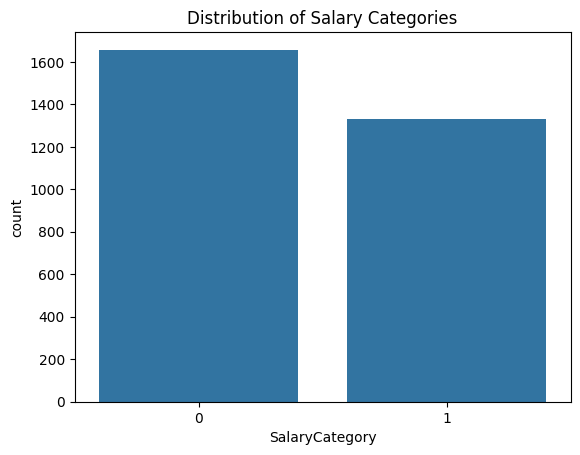

In [39]:
sns.countplot(x='SalaryCategory', data=df)
plt.title('Distribution of Salary Categories')
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Other/Uncategorized'),
  Text(1, 0, 'Computer Science & Engineering'),
  Text(2, 0, 'Electronics & Electrical Engineering'),
  Text(3, 0, 'Mechanical Engineering & Related Fields'),
  Text(4, 0, 'Information Technology & Science')])

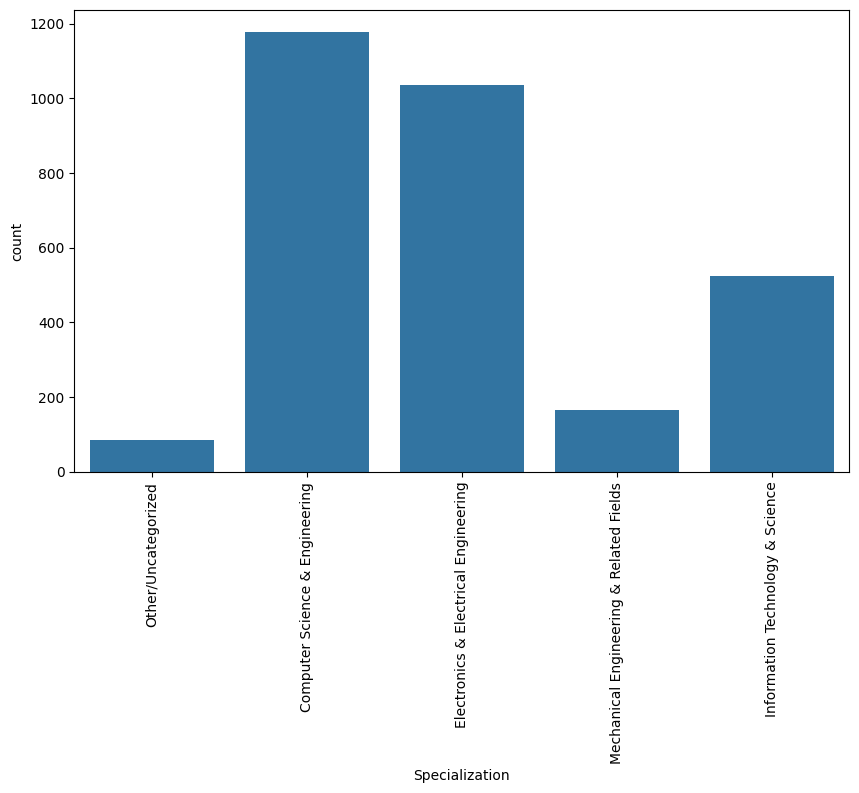

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Specialization'])
plt.xticks(rotation=90)

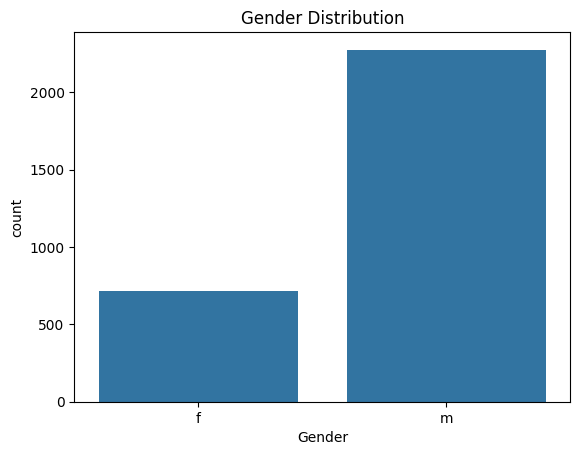

In [41]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

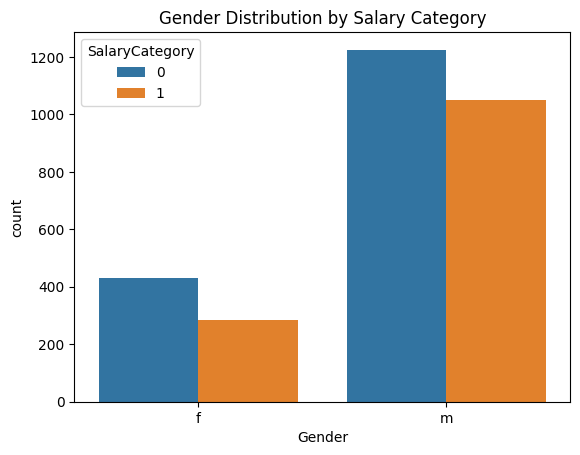

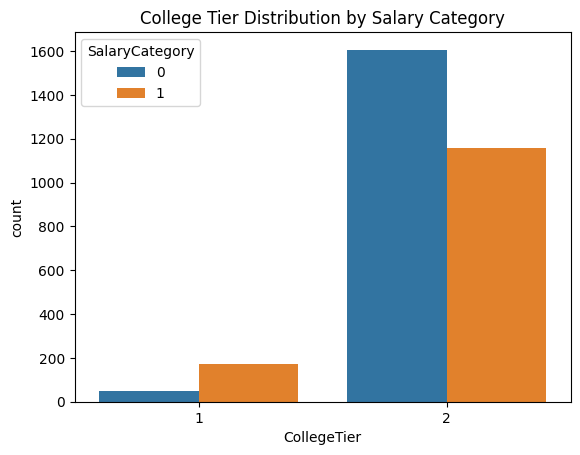

In [42]:
sns.countplot(x='Gender', hue='SalaryCategory', data=df)
plt.title('Gender Distribution by Salary Category')
plt.show()

sns.countplot(x='CollegeTier', hue='SalaryCategory', data=df)
plt.title('College Tier Distribution by Salary Category')
plt.show()

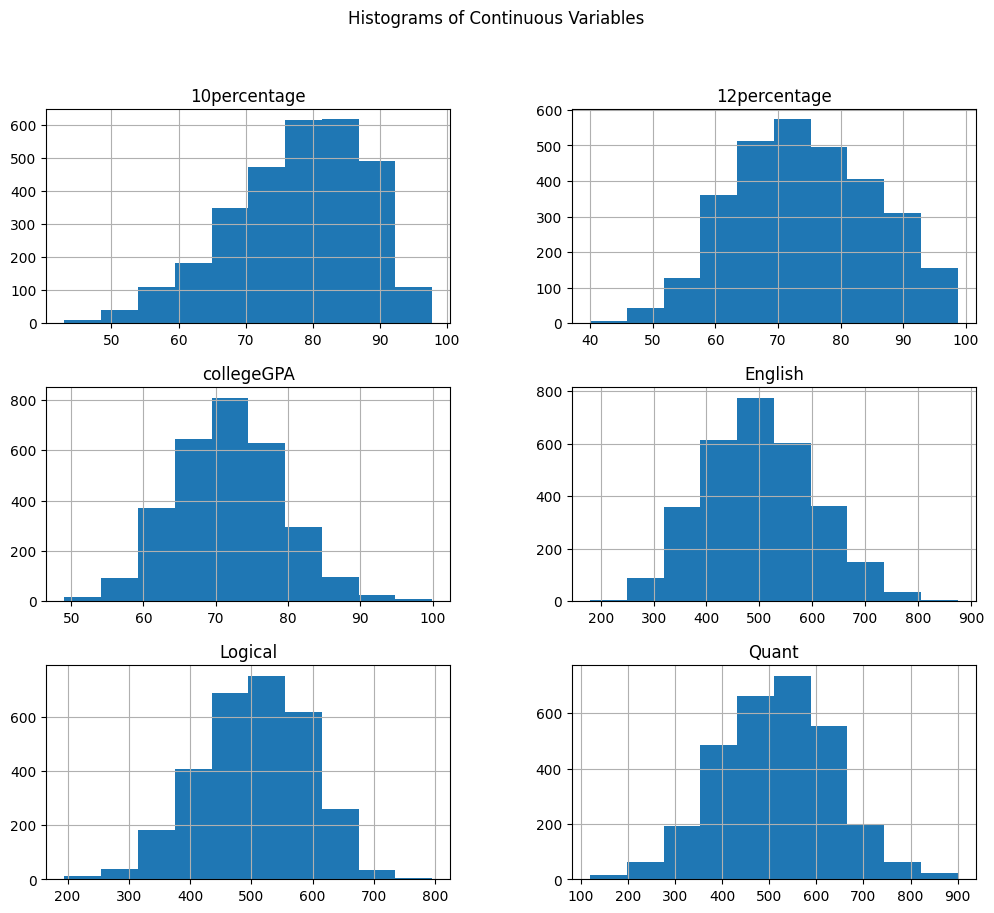

In [43]:
df[['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant']].hist(figsize=(12, 10))
plt.suptitle('Histograms of Continuous Variables')
plt.show()

In [44]:
selected_columns = [df['10percentage'], df['12percentage'], df['collegeGPA'], df['English'], df['Logical'], df['Quant'],df['conscientiousness'], df['extraversion'], df['nueroticism'], df['openess_to_experience']]


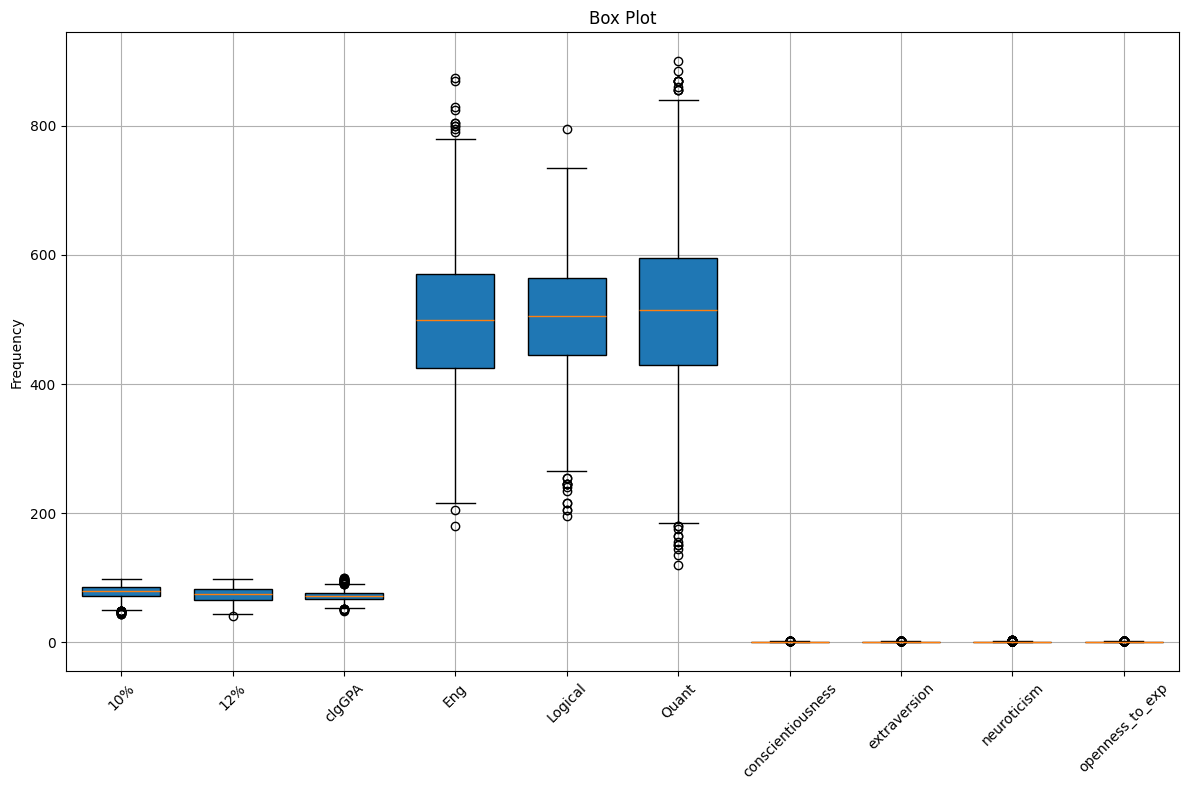

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Increase figure size
plt.boxplot(
    selected_columns,
    labels=['10%', '12%', 'clgGPA', 'Eng', 'Logical', 'Quant',
            'conscientiousness','extraversion', 'neuroticism', 'openness_to_exp'],
    widths=0.7, patch_artist=True
)
plt.ylabel('Frequency')
plt.title('Box Plot')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout
plt.show()

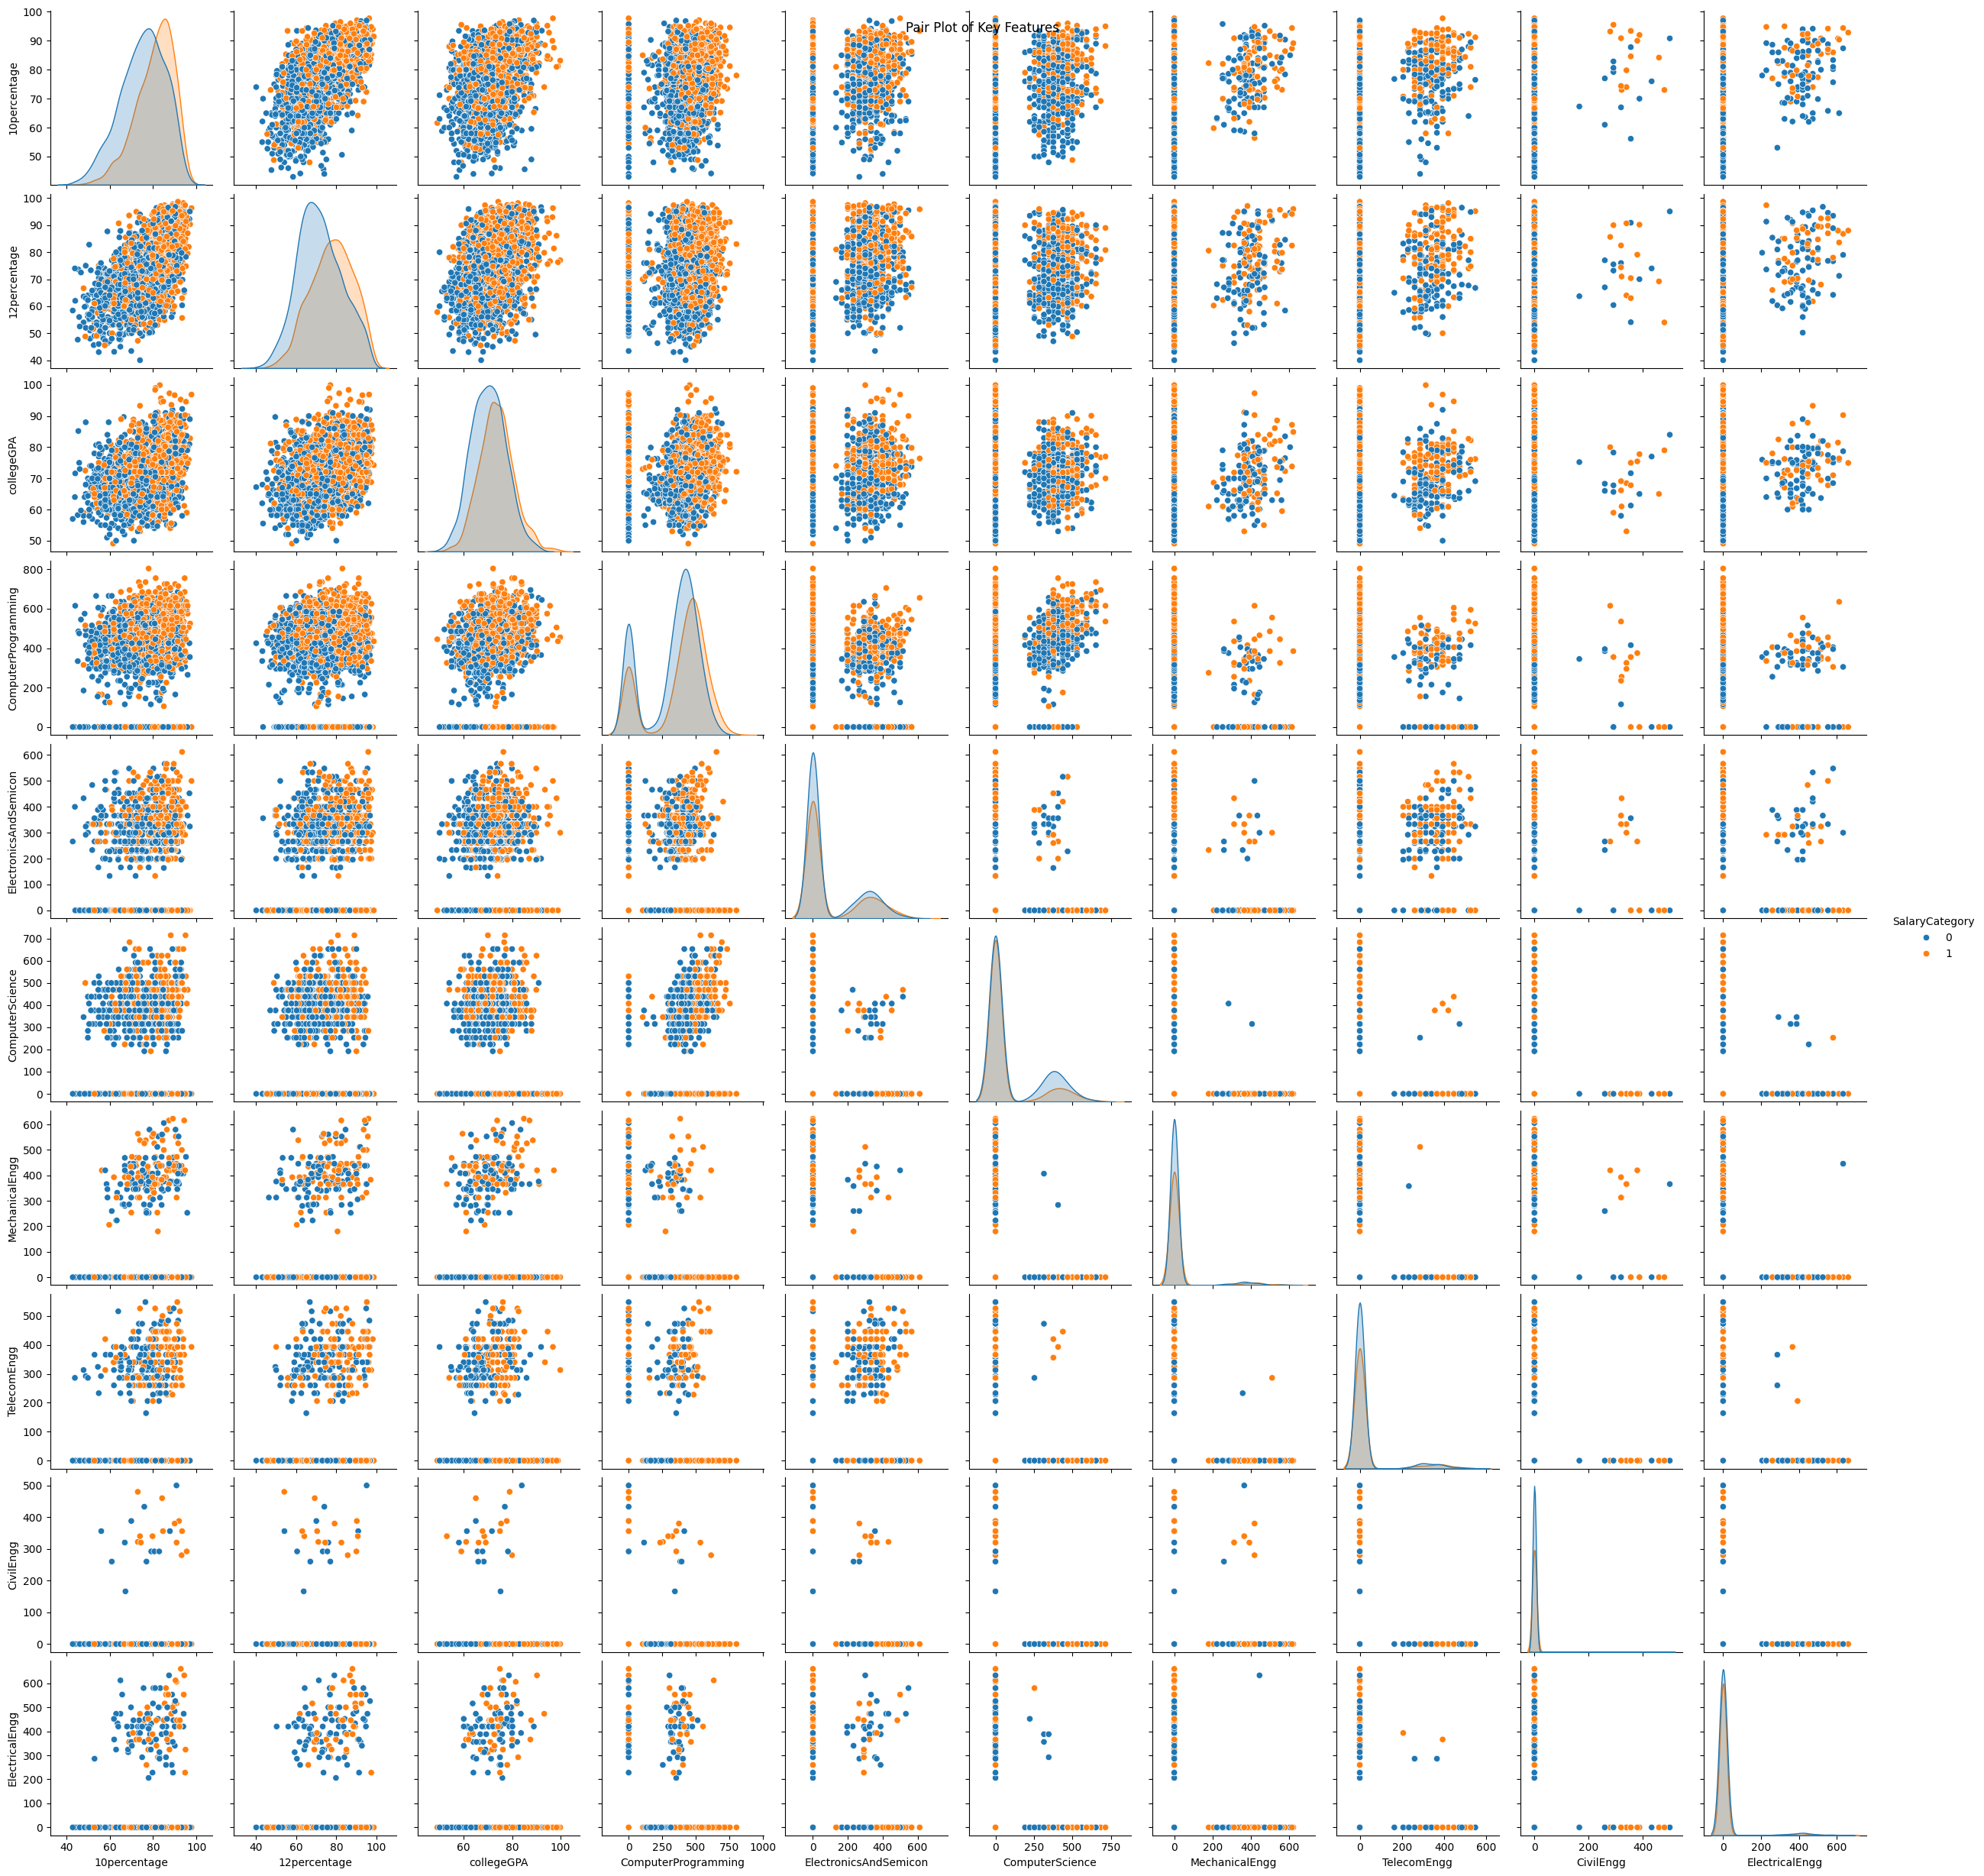

In [46]:
sns.pairplot(df[['10percentage', '12percentage', 'collegeGPA', 'ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','TelecomEngg','CivilEngg','ElectricalEngg','SalaryCategory']], hue='SalaryCategory')
plt.suptitle('Pair Plot of Key Features')
plt.show()

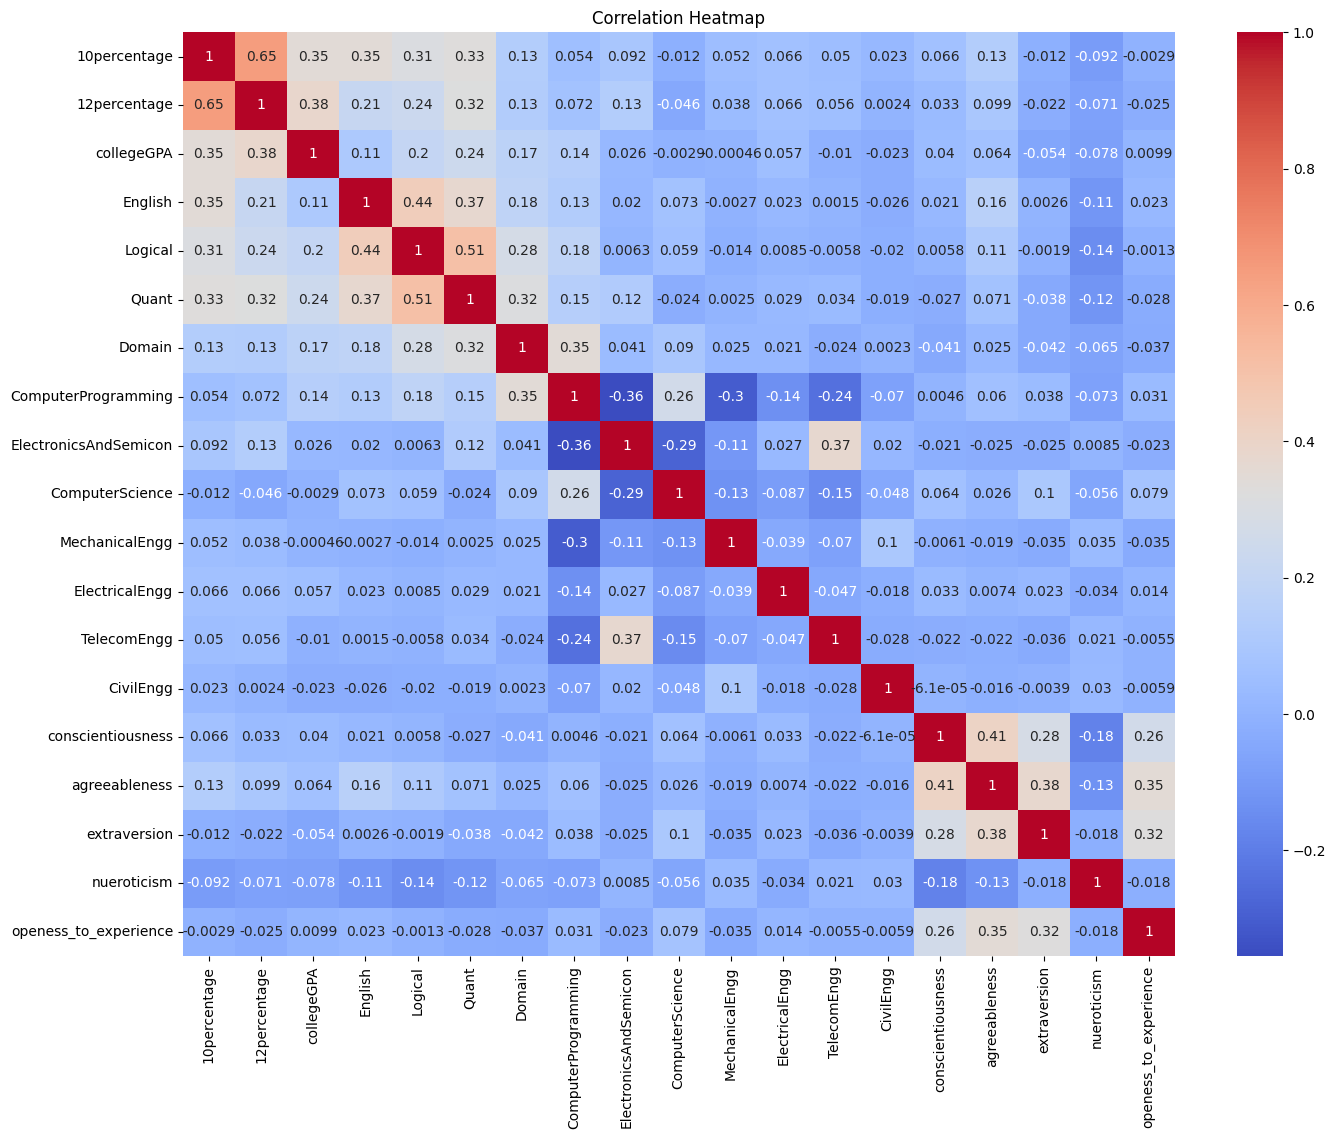

In [47]:
corr = df[['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']].corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

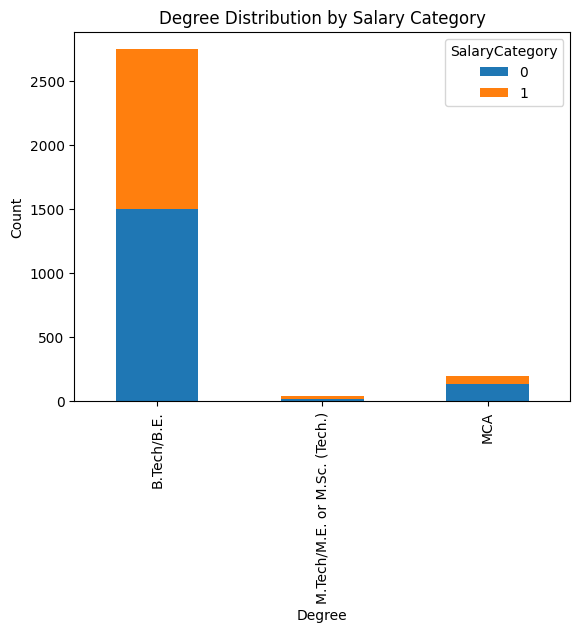

In [48]:
pd.crosstab(df['Degree'], df['SalaryCategory']).plot(kind='bar', stacked=True)
plt.title('Degree Distribution by Salary Category')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

([<matplotlib.patches.Wedge at 0x794e284928c0>,
 [Text(-0.6038795326741617, -1.0369809593320585, '0'),
  Text(0.5535563272830467, 0.9505658275600406, '1')],
 [Text(-0.3522630607265943, -0.6049055596103673, '55.4%'),
  Text(0.30193981488166177, 0.5184904513963857, '44.6%')])

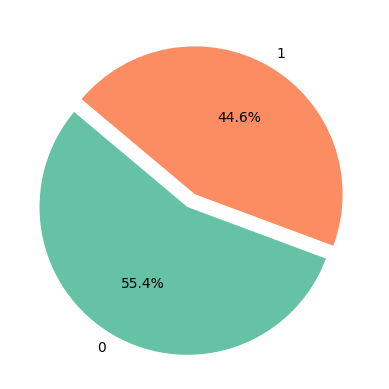

In [49]:
salary_category_counts = df['SalaryCategory'].value_counts()
explode = (0.1, 0)  # Only "explode" the first slice (High) slightly
plt.pie(
    salary_category_counts,
    labels=salary_category_counts.index,
    autopct='%1.1f%%',
    colors=['#66c2a5', '#fc8d62'],
    startangle=140,
    explode=explode
)

In [50]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, train_size=0.80,random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, train_size=0.75,random_state=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.30, train_size=0.70,random_state=1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.40, train_size=0.60,random_state=1)

In [51]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train1, y_train1)
predictions1 = logreg.predict(X_test1)
print(predictions1)

[1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1
 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1
 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0
 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0
 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1
 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train2, y_train2)
predictions2 = logreg.predict(X_test2)
print(predictions2)

[1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1
 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0
 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1
 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0
 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1
 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0
 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train3, y_train3)
predictions3 = logreg.predict(X_test3)
print(predictions3)

[0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0
 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1
 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1
 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0
 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 1 0 0 1 0 1 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train4, y_train4)
predictions4 = logreg.predict(X_test4)
print(predictions4)

[1 1 1 ... 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
z=confusion_matrix(y_test1, predictions1)
z

array([[233,  75],
       [140, 150]])

In [57]:
z=confusion_matrix(y_test2, predictions2)
z

array([[285, 111],
       [162, 190]])

In [58]:
z=confusion_matrix(y_test3, predictions3)
z

array([[366, 101],
       [191, 239]])

In [59]:
z=confusion_matrix(y_test4, predictions4)
z

array([[475, 175],
       [250, 296]])

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,predictions1)

0.6404682274247492

In [61]:
accuracy_score(y_test2,predictions2)

0.6350267379679144

In [62]:
accuracy_score(y_test3,predictions3)

0.6744704570791528

In [63]:
accuracy_score(y_test4,predictions4)

0.6446488294314381

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,predictions1))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68       308
           1       0.67      0.52      0.58       290

    accuracy                           0.64       598
   macro avg       0.65      0.64      0.63       598
weighted avg       0.65      0.64      0.63       598



In [65]:
print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       396
           1       0.63      0.54      0.58       352

    accuracy                           0.64       748
   macro avg       0.63      0.63      0.63       748
weighted avg       0.63      0.64      0.63       748



In [66]:
print(classification_report(y_test3,predictions3))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71       467
           1       0.70      0.56      0.62       430

    accuracy                           0.67       897
   macro avg       0.68      0.67      0.67       897
weighted avg       0.68      0.67      0.67       897



In [67]:
print(classification_report(y_test4,predictions4))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69       650
           1       0.63      0.54      0.58       546

    accuracy                           0.64      1196
   macro avg       0.64      0.64      0.64      1196
weighted avg       0.64      0.64      0.64      1196



In [68]:
from sklearn.neighbors import KNeighborsClassifier
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.20, train_size=0.80,random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, train_size=0.75,random_state=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.30, train_size=0.70,random_state=1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.40, train_size=0.60,random_state=1)

In [69]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train1,y_train1)

KNeighborsClassifier(n_neighbors=25)

In [70]:
y_pred1 = model.predict(X_test1)
print(y_pred1)

[1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0
 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1
 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 

In [71]:
df=pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
print(df)

      Predicted  Actual
1651          1       0
2828          1       1
383           1       1
1601          0       0
2376          0       1
...         ...     ...
303           1       1
1540          0       1
2210          1       1
2662          1       1
134           0       0

[598 rows x 2 columns]


In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.6722408026755853

In [73]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1,y_pred1)
cm1

array([[242,  66],
       [130, 160]])

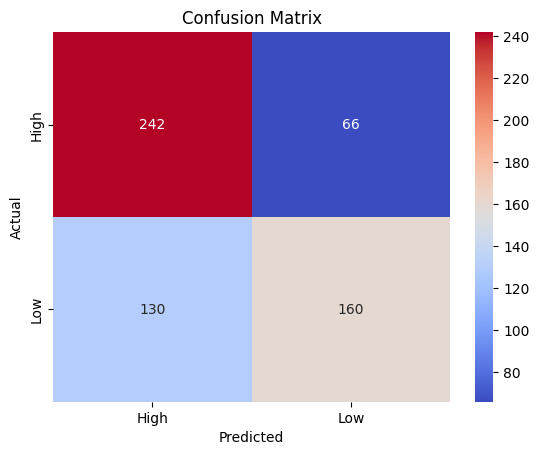

In [74]:
sns.heatmap(cm1, annot=True, fmt="d", cmap="coolwarm", xticklabels=["High", "Low"], yticklabels=["High", "Low"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [75]:
from sklearn.metrics import classification_report
classification_metrics1 = classification_report(y_test1, y_pred1)
print(classification_metrics1)

              precision    recall  f1-score   support

           0       0.65      0.79      0.71       308
           1       0.71      0.55      0.62       290

    accuracy                           0.67       598
   macro avg       0.68      0.67      0.67       598
weighted avg       0.68      0.67      0.67       598



In [76]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=25)

In [77]:
y_pred2 = model.predict(X_test2)
print(y_pred2)

[1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1
 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0
 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 1 0 1 0 0 0 

In [78]:
df=pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
print(df)

      Predicted  Actual
1651          1       0
2828          1       1
383           1       1
1601          0       0
2376          0       1
...         ...     ...
1892          0       0
645           1       0
2303          0       0
1028          0       1
2326          0       0

[748 rows x 2 columns]


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.6885026737967914

In [80]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test2,y_pred2)
cm2

array([[310,  86],
       [147, 205]])

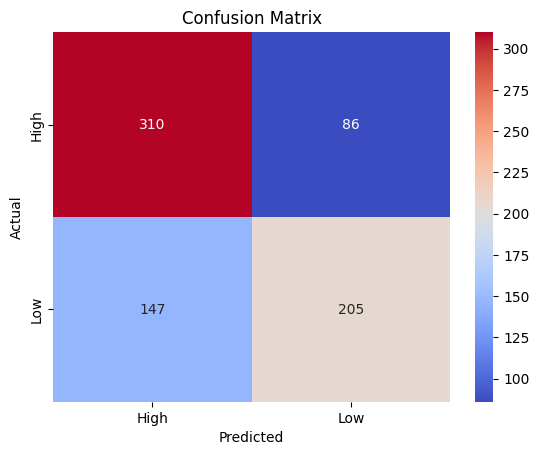

In [81]:
sns.heatmap(cm2, annot=True, fmt="d", cmap="coolwarm", xticklabels=["High", "Low"], yticklabels=["High", "Low"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [82]:
from sklearn.metrics import classification_report
classification_metrics2 = classification_report(y_test2, y_pred2)
print(classification_metrics2)

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       396
           1       0.70      0.58      0.64       352

    accuracy                           0.69       748
   macro avg       0.69      0.68      0.68       748
weighted avg       0.69      0.69      0.68       748



In [83]:
model=KNeighborsClassifier(n_neighbors=25)
model.fit(X_train3,y_train3)

KNeighborsClassifier(n_neighbors=25)

In [84]:
y_pred3 = model.predict(X_test3)
print(y_pred3)

[1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1
 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 1 0 1 0 0 0 

In [85]:
df=pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
print(df)

      Predicted  Actual
1651          1       0
2828          1       1
383           1       1
1601          0       0
2376          0       1
...         ...     ...
1840          0       0
2781          1       1
1242          1       1
848           0       1
1572          1       1

[897 rows x 2 columns]


In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.6755852842809364

In [87]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test3,y_pred3)
cm3

array([[366, 101],
       [190, 240]])

In [88]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test3,y_pred3)
cm3

array([[366, 101],
       [190, 240]])

In [89]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test3,y_pred3)
cm3

array([[366, 101],
       [190, 240]])